In [1]:
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv("airlines_flights_data.csv")

In [4]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [7]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['flight']=le.fit_transform(df['flight'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])

In [11]:
import pickle
import joblib
with open('le.pkl','wb')as f:
  pickle.dump(le,f)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
value=df['class'].value_counts()

In [14]:
value

class
1    206666
0     93487
Name: count, dtype: int64

In [15]:
x=df.drop(['class'], axis=1)
y=df['class']
print(x)
print(y)

         index  airline  flight  source_city  departure_time  stops  \
0            0        4    1408            2               2      2   
1            1        4    1387            2               1      2   
2            2        0    1213            2               1      2   
3            3        5    1559            2               4      2   
4            4        5    1549            2               4      2   
...        ...      ...     ...          ...             ...    ...   
300148  300148        5    1477            1               4      0   
300149  300149        5    1481            1               0      0   
300150  300150        5    1486            1               1      0   
300151  300151        5    1483            1               1      0   
300152  300152        5    1477            1               4      0   

        arrival_time  destination_city  duration  days_left  price  
0                  5                 5      2.17          1   5953  
1        

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[-1.73204504  0.48827006  0.74916456 ... -1.39753079 -1.84387477
  -0.65806849]
 [-1.7320335   0.48827006  0.69994857 ... -1.3752838  -1.84387477
  -0.65806849]
 [-1.73202195 -1.69363332  0.29215898 ... -1.39753079 -1.84387477
  -0.65793631]
 ...
 [ 1.73202195  1.0337459   0.93196679 ...  0.22371837  1.69569214
   2.56454459]
 [ 1.7320335   1.0337459   0.92493593 ... -0.30881888  1.69569214
   2.67407096]
 [ 1.73204504  1.0337459   0.91087422 ... -0.29769538  1.69569214
   2.67407096]]


In [17]:
with open('scaler.pkl','wb')as f:
  pickle.dump(sc,f)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [20]:
model= Sequential([
    Dense(16, activation='relu',
    input_shape=(x.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\thenm\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
with open('scaler.pkl','wb')as f:
  pickle.dump(model,f)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
early_stop=EarlyStopping(patience=2,restore_best_weights=True)

In [26]:
history=model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/2
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 1.0000 - loss: 2.6910e-05 - val_accuracy: 1.0000 - val_loss: 9.2091e-06
Epoch 2/2
7504/7504 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 1.0000 - loss: 3.6597e-05 - val_accuracy: 1.0000 - val_loss: 1.1914e-06


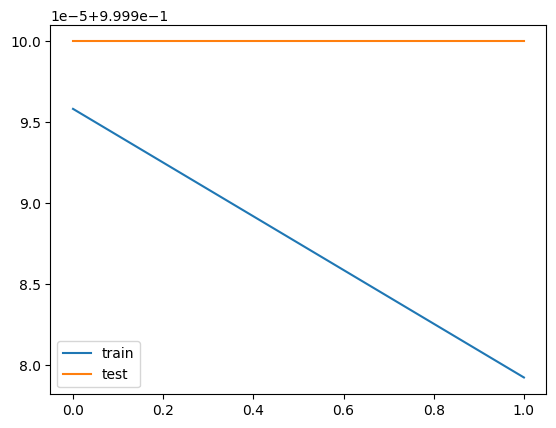

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

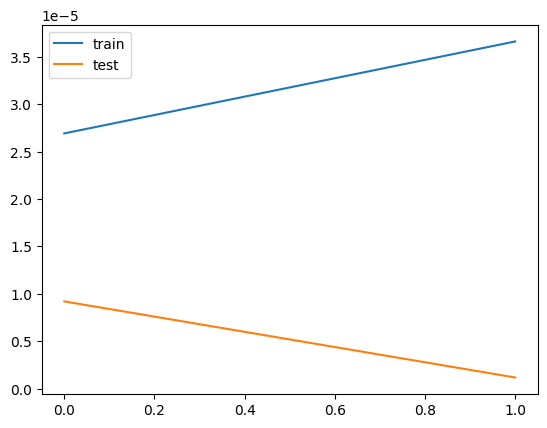

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031

[[18714     1]
 [    2 41314]]


In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_test,y_test)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031

[[18715     0]
 [    3 41313]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031

[[18715     0]
 [    0 41316]]


In [34]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_test,y_test)
y_pred=dc.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031

[[18715     0]
 [    0 41316]]


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031

[[18715     0]
 [    0 41316]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_test,y_test)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18715
           1       1.00      1.00      1.00     41316

    accuracy                           1.00     60031
   macro avg       1.00      1.00      1.00     60031
weighted avg       1.00      1.00      1.00     60031

[[18715     0]
 [    0 41316]]


In [38]:
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18715
           1       0.99      1.00      1.00     41316

    accuracy                           0.99     60031
   macro avg       0.99      0.99      0.99     60031
weighted avg       0.99      0.99      0.99     60031

[[18433   282]
 [   65 41251]]


In [39]:
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
nb.fit(x_test,y_test)
y_pred=nb.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18715
           1       0.99      1.00      1.00     41316

    accuracy                           0.99     60031
   macro avg       0.99      0.99      0.99     60031
weighted avg       0.99      0.99      0.99     60031

[[18433   282]
 [   65 41251]]
